In [49]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 1.2 MB/s eta 0:00:011


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=5ad0a5e241582031e5542e93d6ba7a4ec751c3726e7b633dd9692ede6653bf79
  Stored in directory: /Users/thetmyatnoe/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly
import plotly.express as px

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [2]:
#Data Collection And Processing
#load data to dataframe
heart_data = pd.read_csv('/Users/thetmyatnoe/Downloads/heart.csv')

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(heart_data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
heart_data.groupby('target').size()

target
0    138
1    165
dtype: int64

In [10]:
#Data Vitsualization
sn.set()

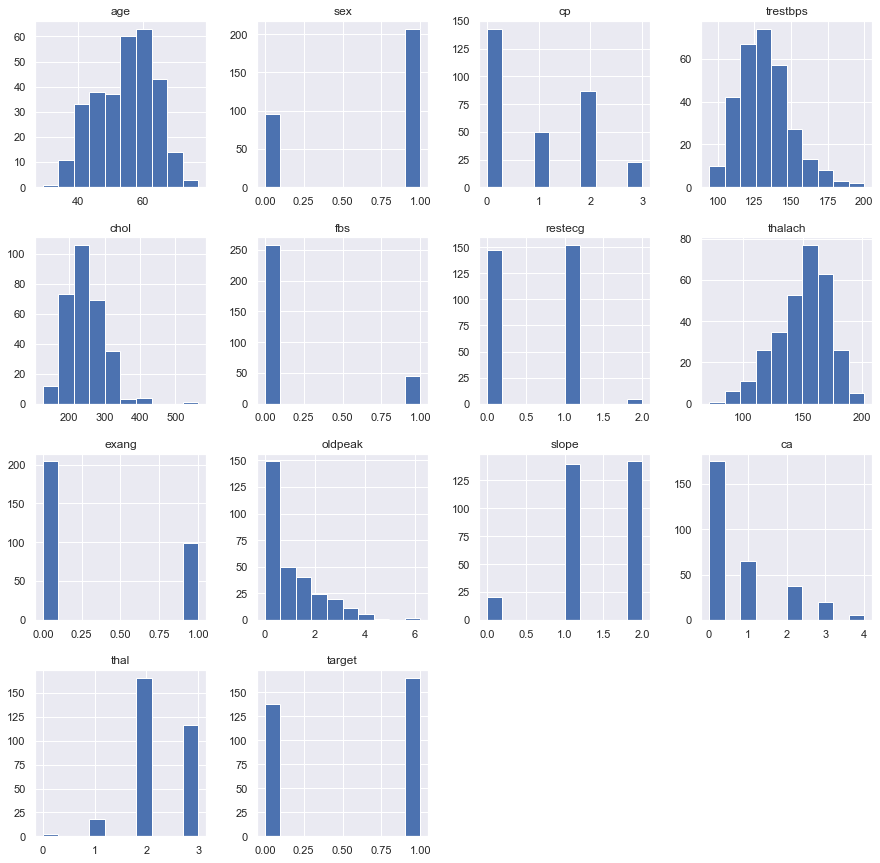

In [11]:
heart_data.hist(figsize=(15,15))
plt.show()

1    165
0    138
Name: target, dtype: int64

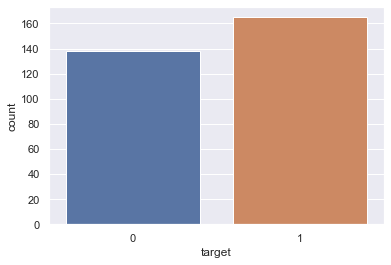

In [12]:
sn.countplot('target',data = heart_data)
heart_data.target.value_counts()

1    207
0     96
Name: sex, dtype: int64

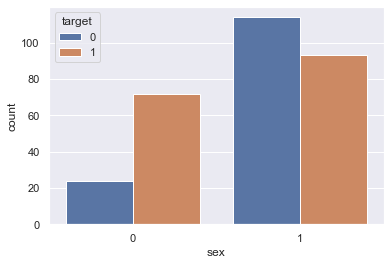

In [13]:
sn.countplot('sex',hue='target',data=heart_data)
heart_data.sex.value_counts()

0    258
1     45
Name: fbs, dtype: int64

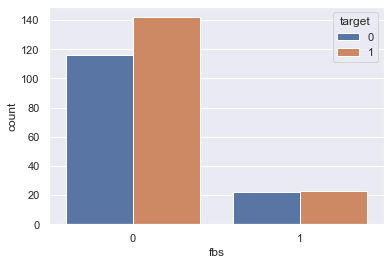

In [14]:
sn.countplot('fbs',hue='target',data=heart_data)
heart_data.fbs.value_counts()

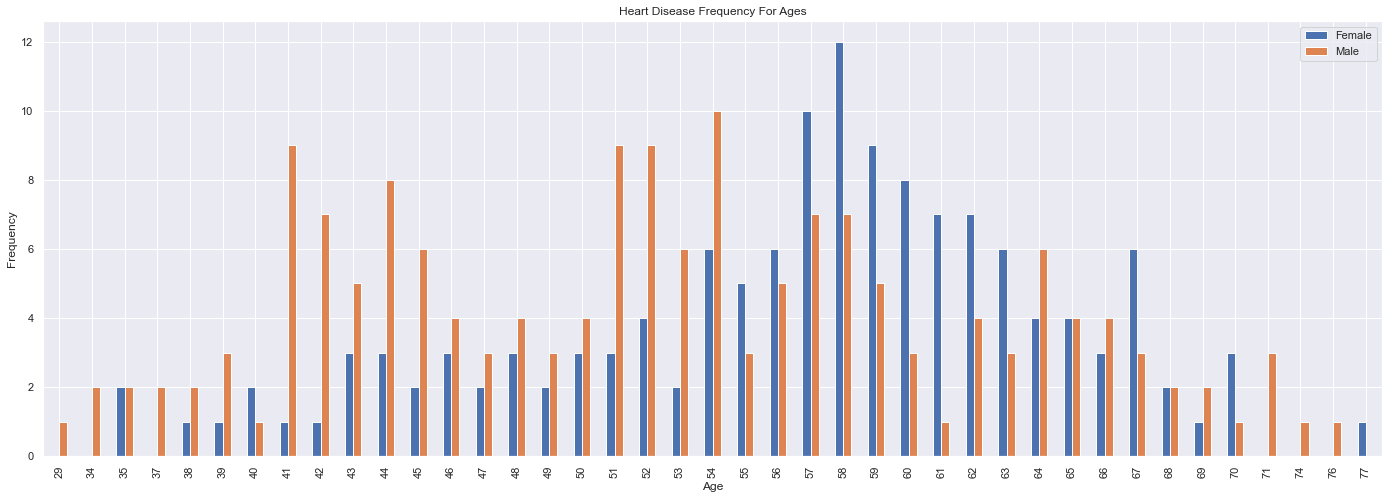

In [15]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(24,8))
plt.title('Heart Disease Frequency For Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Female','Male'])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [16]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


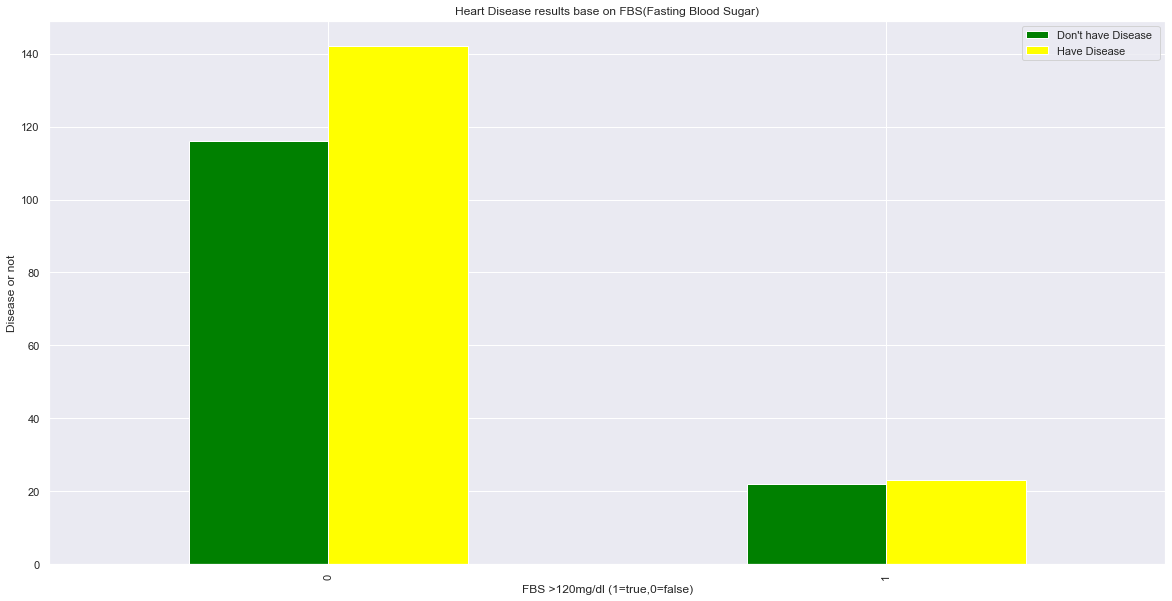

In [17]:
pd.crosstab(heart_data.fbs,heart_data.target).plot(kind='bar',figsize=(20,10),color=['green','yellow'])
plt.title("Heart Disease results base on FBS(Fasting Blood Sugar)")
plt.xlabel('FBS >120mg/dl (1=true,0=false)')
plt.ylabel('Disease or not')
plt.legend(["Don't have Disease ","Have Disease"])
plt.show()

<AxesSubplot:xlabel='trestbps', ylabel='target'>

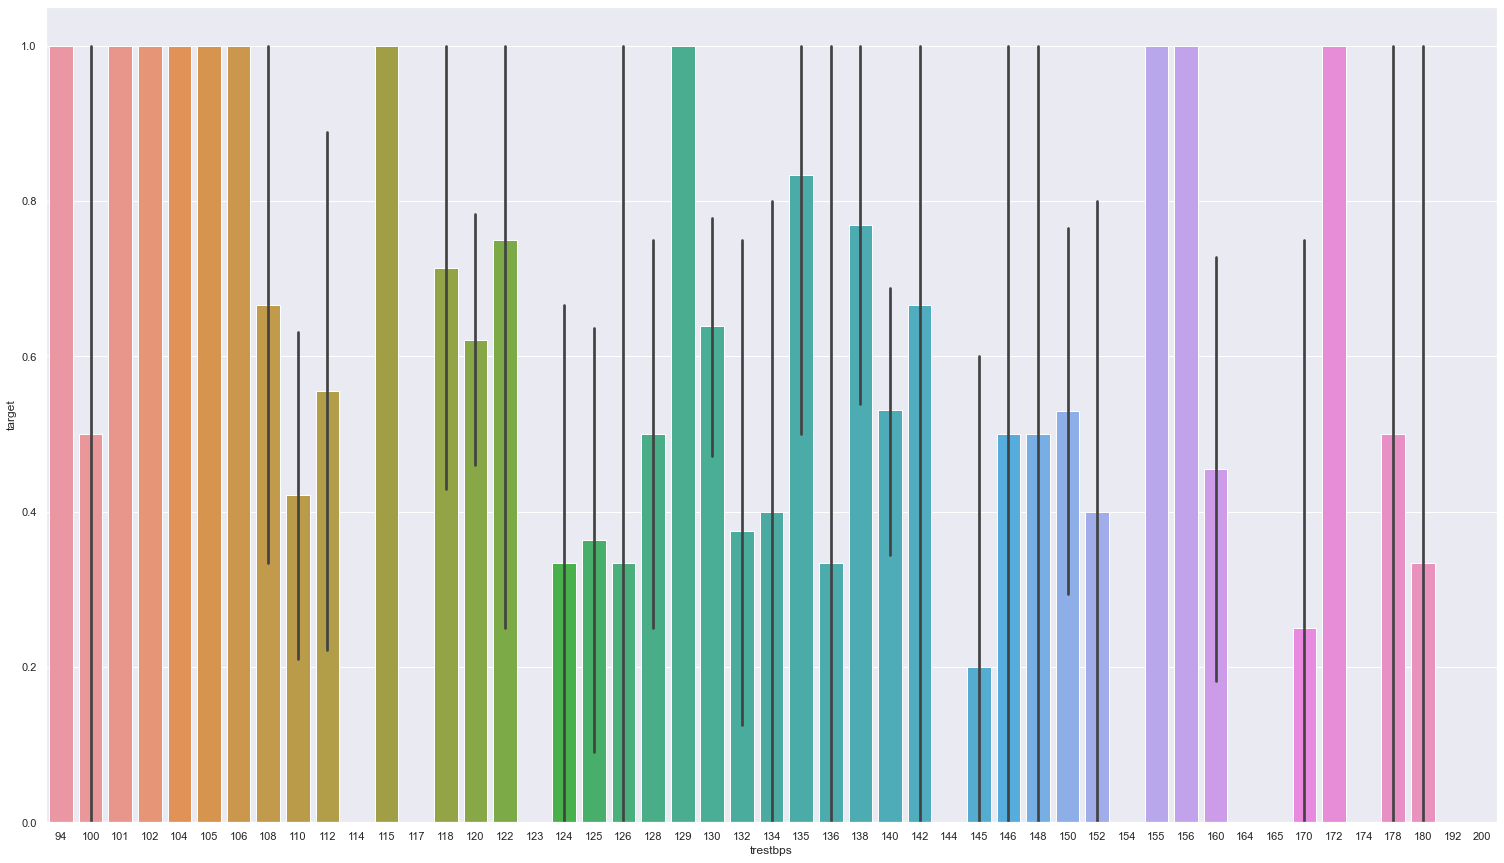

In [18]:
plt.figure(figsize=(26,15))
y = heart_data.target
sn.barplot(heart_data['trestbps'],y)

<AxesSubplot:xlabel='restecg', ylabel='target'>

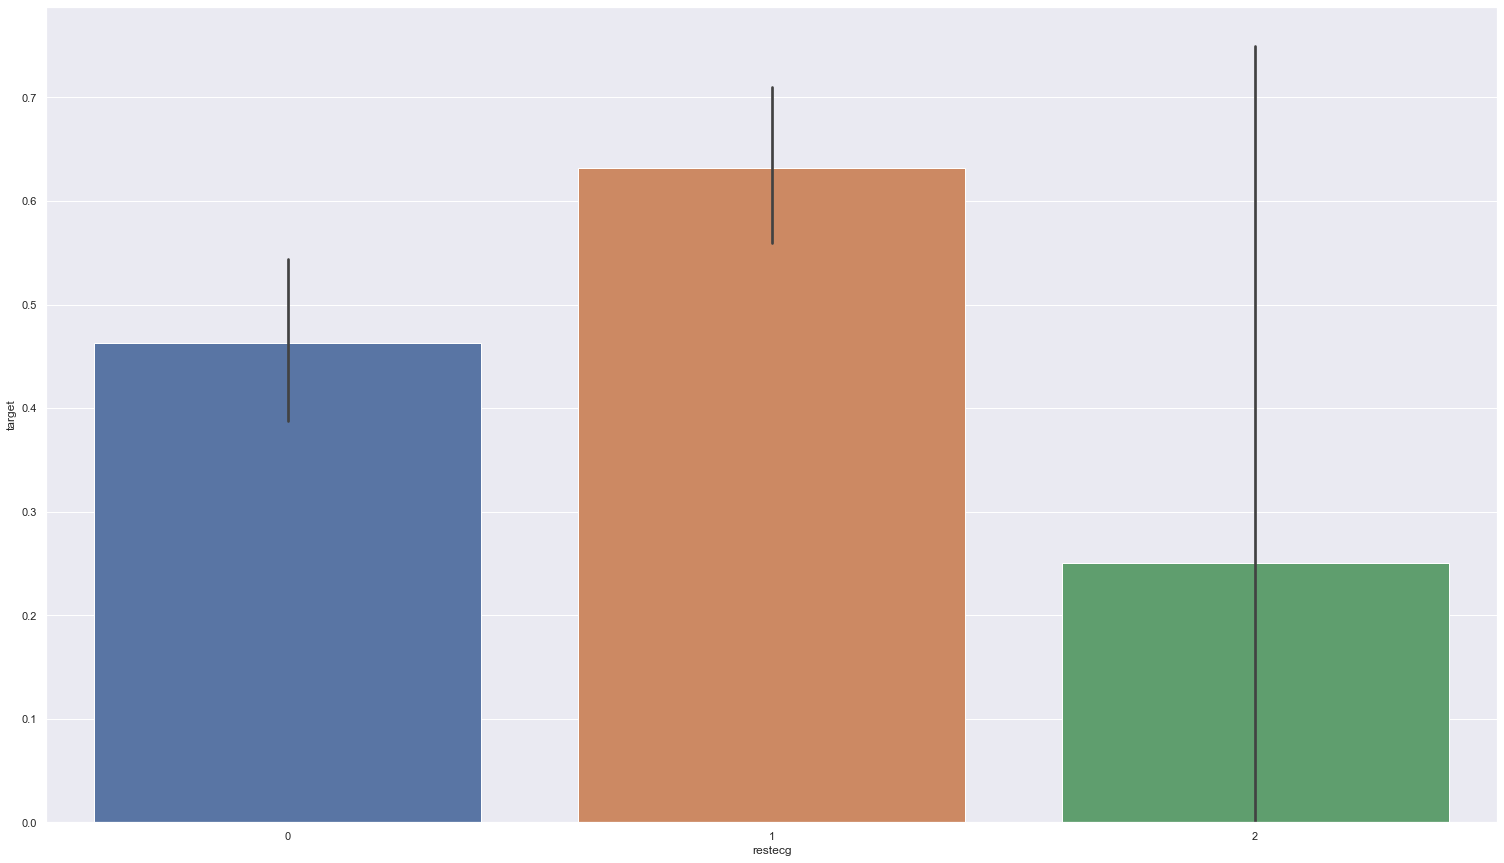

In [19]:
plt.figure(figsize=(26,15))
sn.barplot(heart_data['restecg'],y)


<AxesSubplot:xlabel='exang', ylabel='target'>

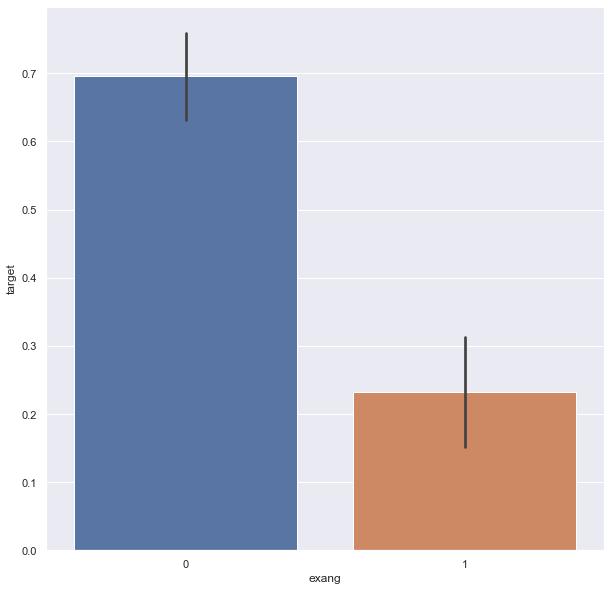

In [20]:
plt.figure(figsize=(10, 10))
sn.barplot(heart_data["exang"],y)


<AxesSubplot:xlabel='slope', ylabel='target'>

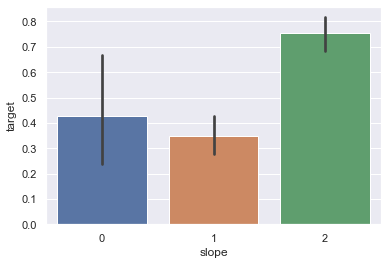

In [21]:
#plt.figure(figsize=(25, 10))
sn.barplot(heart_data["slope"],y)

<AxesSubplot:xlabel='ca', ylabel='count'>

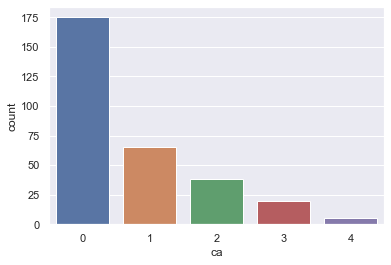

In [22]:
sn.countplot(heart_data['ca'])

<AxesSubplot:xlabel='thal', ylabel='target'>

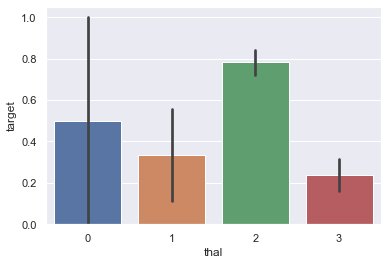

In [23]:
sn.barplot(heart_data['thal'],y)

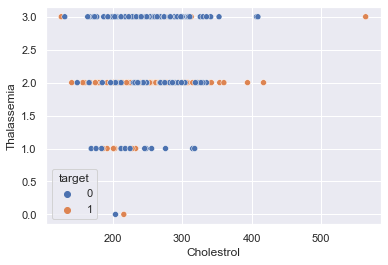

In [24]:
sn.scatterplot(x='chol',y='thal',data=heart_data,hue='target')
plt.xlabel('Cholestrol')
plt.ylabel('Thalassemia')
plt.show()

<AxesSubplot:xlabel='thal', ylabel='Density'>

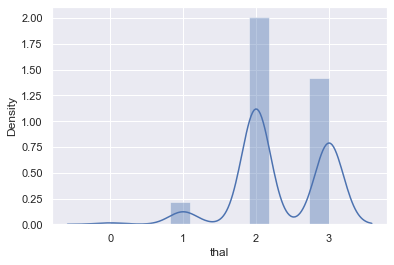

In [25]:
sn.distplot(heart_data['thal'])

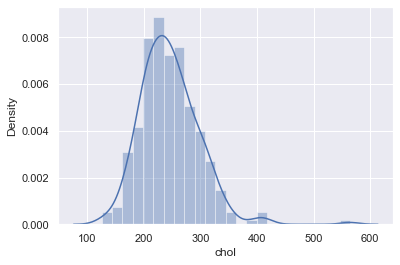

In [26]:
sn.distplot(heart_data["chol"])
plt.show()

In [27]:
#store numeric values in cnames
cnames=['age','trestbps','chol','oldpeak','thalach']


<AxesSubplot:>

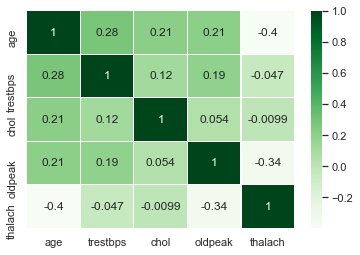

In [28]:
sn.heatmap(heart_data[cnames].corr(),annot=True,cmap='Greens',linewidths=0.1)

In [29]:
#data preprocessing
x = heart_data.iloc[:,:-1]


In [30]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y = heart_data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
heart_data.shape

(303, 14)

In [33]:
x.shape

(303, 13)

In [34]:
y.shape

(303,)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [37]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [38]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [39]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [40]:
y_test.shape

(61,)

In [41]:
#using LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [43]:
lr_accuracy =  accuracy_score(y_test,y_pred) *100
lr_precision = precision_score(y_test,y_pred)*100
lr_recall =  recall_score(y_test,y_pred)*100
lr_f1score = f1_score(y_test,y_pred)*100

print('Accurary Rate', lr_accuracy,'%')
print('Precision Score: ', lr_precision,'%')
print('Recall Score:',lr_recall,'%')
print('f1 Score',lr_f1score,'%')

Accurary Rate 85.24590163934425 %
Precision Score:  85.71428571428571 %
Recall Score: 88.23529411764706 %
f1 Score 86.95652173913044 %


In [44]:
#describing target_names
Category = ["No,you don\'t have Heart disease","Sorry,you are having Heart Disease"]

In [45]:
Category

["No,you don't have Heart disease", 'Sorry,you are having Heart Disease']

In [46]:
n_data = np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])
n_data_prediction_lr = lr.predict(n_data)

In [47]:
n_data_prediction_lr

array([1])

In [48]:
print(Category[int(n_data_prediction_lr)])

Sorry,you are having Heart Disease


In [49]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [51]:
Y_predict = dt.predict(x_test)

In [52]:
Y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [53]:
dt_accuracy =  accuracy_score(y_test,Y_predict) *100
dt_precision = precision_score(y_test,Y_predict)*100
dt_recall =  recall_score(y_test,Y_predict)*100
dt_f1score = f1_score(y_test,Y_predict)*100

print('Accurary Rate', dt_accuracy,'%')
print('Precision Score: ', dt_precision,'%')
print('Recall Score:',dt_recall,'%')
print('f1 Score',dt_f1score,'%')

Accurary Rate 80.32786885245902 %
Precision Score:  84.375 %
Recall Score: 79.41176470588235 %
f1 Score 81.81818181818183 %


In [54]:
dt.feature_importances_  #youtube mhr pyn kyi yan 

array([0.17222453, 0.04753031, 0.25340799, 0.0489557 , 0.02974045,
       0.0249639 , 0.01560243, 0.08449066, 0.00887605, 0.04107042,
       0.01497834, 0.1619417 , 0.09621751])

In [55]:
def plot_feature_importance(model) :
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),x)
    plt.xlabel('Feature Importance')
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)

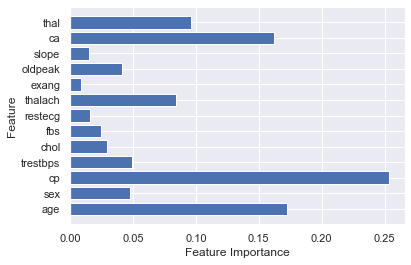

In [56]:
plot_feature_importance(dt)

In [57]:
#describing target_names
Category = ["No,you don\'t have Heart disease","Sorry,you are having Heart Disease"]

In [58]:
Category

["No,you don't have Heart disease", 'Sorry,you are having Heart Disease']

In [59]:
new_data = np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])
new_data_prediction_dt = dt.predict(new_data)

In [60]:
new_data_prediction_dt

array([1])

In [61]:
print(Category[int(new_data_prediction_dt)])

Sorry,you are having Heart Disease


In [82]:
#SVM

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_std = scaler.transform(x)

In [83]:
x_train_std,x_test_std,y_train,y_test = train_test_split(x_std,y,test_size=0.25,random_state=0)

In [84]:
x_train_std

array([[ 0.40075247,  0.68100522,  1.00257707, ...,  0.97635214,
         1.24459328,  1.12302895],
       [-0.26098049,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188],
       [-0.04040284,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887,  1.12302895],
       ...,
       [ 0.18017482,  0.68100522,  1.97312292, ..., -0.64911323,
        -0.71442887,  1.12302895],
       [-0.81242462,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.40075247,  0.68100522,  0.03203122, ..., -0.64911323,
        -0.71442887, -0.51292188]])

In [85]:
y_train

173    0
261    0
37     1
101    1
166    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 227, dtype: int64

In [77]:
#Training the Model
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train_std,y_train)

SVC(kernel='linear')

In [78]:
y_predSVM = clf.predict(x_test_std)
y_predSVM

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [79]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
46     1
160    1
232    0
181    0
27     1
Name: target, Length: 76, dtype: int64

In [95]:
svm_accuracy =accuracy_score(y_test,y_predSVM)*100
svm_precision =precision_score(y_test,y_predSVM)*100
svm_recall=recall_score(y_test,y_predSVM)*100
svm_f1 =f1_score(y_test,y_predSVM)*100

print('Accuracy',svm_accuracy,'%')
print('Precision',svm_precision,'%')
print('Recall',svm_recall,'%')
print('F1_score',svm_f1,'%')

Accuracy 85.52631578947368 %
Precision 82.0 %
Recall 95.34883720930233 %
F1_score 88.17204301075269 %


In [87]:
custom_data_svc=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
custom_data_svc_std=scaler.transform(custom_data_svc)
custom_data_prediction_svc=clf.predict(custom_data_svc_std)

In [88]:
custom_data_prediction_svc

array([1])

In [89]:
print(Category[int(custom_data_prediction_svc)])

Sorry,you are having Heart Disease


In [98]:
algorithms=['Logistic Regression','Decision Tree','Support Vector Machine']
scores=[lr_accuracy,dt_accuracy,svm_accuracy]

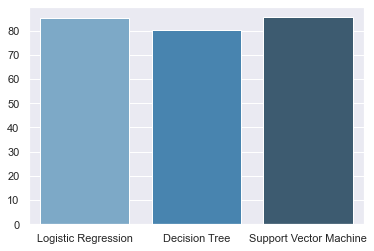

In [99]:
sn.barplot(algorithms,scores,palette="Blues_d")
plt.show()

In [100]:
pre_scores = [lr_precision,dt_precision,svm_precision]

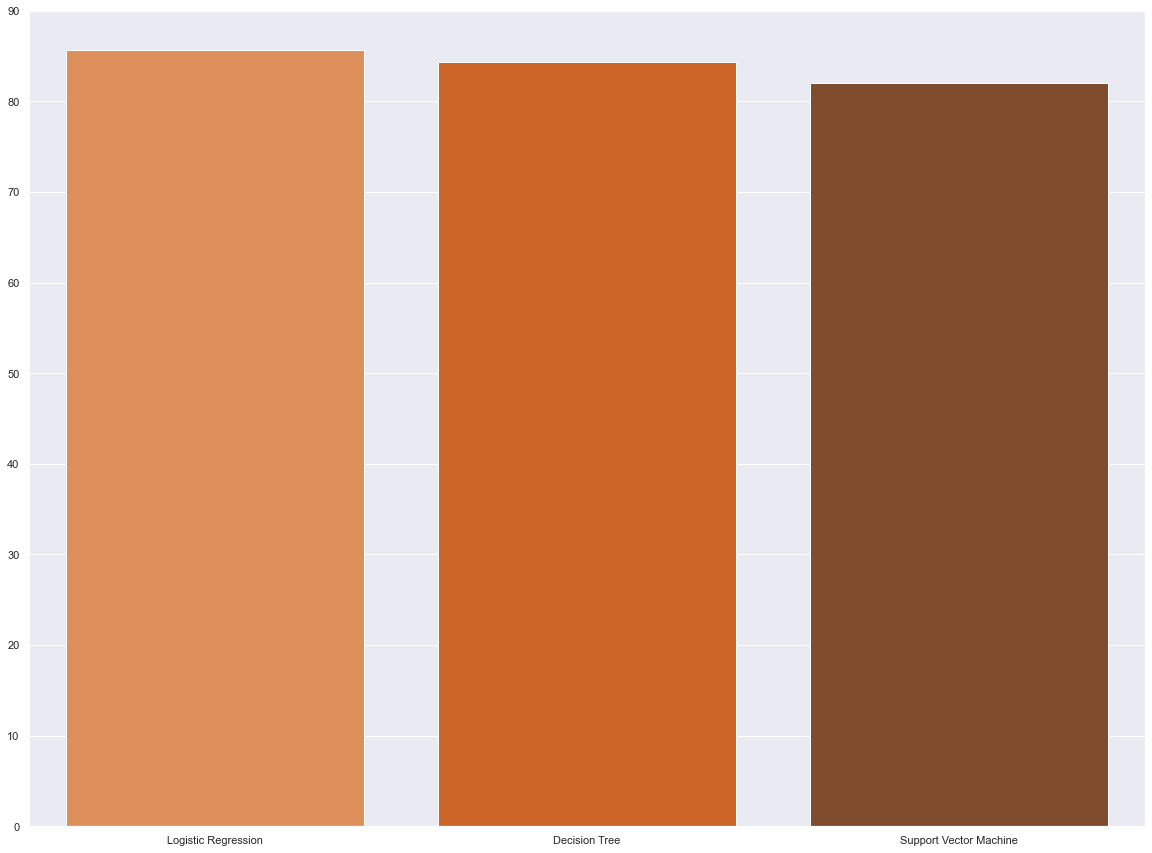

In [102]:
plt.figure(figsize=(20,15))
sn.barplot(algorithms,pre_scores,palette='Oranges_d')
plt.show()

In [104]:
recall_scores = [lr_recall,dt_recall,svm_recall]

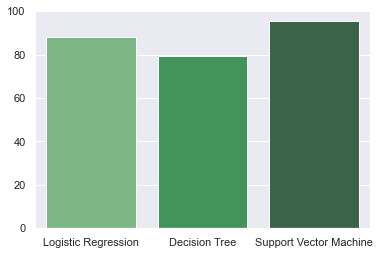

In [105]:
sn.barplot(algorithms,recall_scores,palette="Greens_d")
plt.show()

In [106]:
f1_scores = [lr_f1score,dt_f1score,svm_f1]

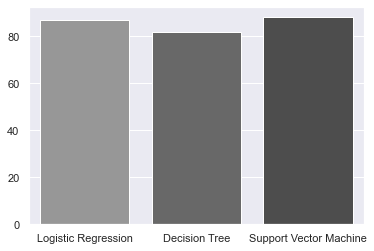

In [108]:
sn.barplot(algorithms,f1_scores,palette="Greys_d")
plt.show()